## Import Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from time import sleep
from IPython.display import clear_output

## Import Custom Libraries

In [2]:
from map import CustomGraph
from agent import Agent

## Create a Graph

Edge between 24 and 33 overlaps with an existing edge. Skipping.
Edge between 39 and 42 overlaps with an existing edge. Skipping.
Edge between 3 and 40 overlaps with an existing edge. Skipping.
Edge between 19 and 48 overlaps with an existing edge. Skipping.
Edge between 13 and 28 overlaps with an existing edge. Skipping.
Edge between 27 and 29 overlaps with an existing edge. Skipping.
Edge between 27 and 31 overlaps with an existing edge. Skipping.
Edge between 30 and 45 overlaps with an existing edge. Skipping.
Edge between 46 and 47 overlaps with an existing edge. Skipping.
Edge between 14 and 21 overlaps with an existing edge. Skipping.
Edge between 23 and 33 overlaps with an existing edge. Skipping.
Edge between 9 and 37 overlaps with an existing edge. Skipping.
Edge between 32 and 50 overlaps with an existing edge. Skipping.
Edge between 16 and 23 overlaps with an existing edge. Skipping.
Edge between 19 and 49 overlaps with an existing edge. Skipping.
Edge between 7 and 41 overl

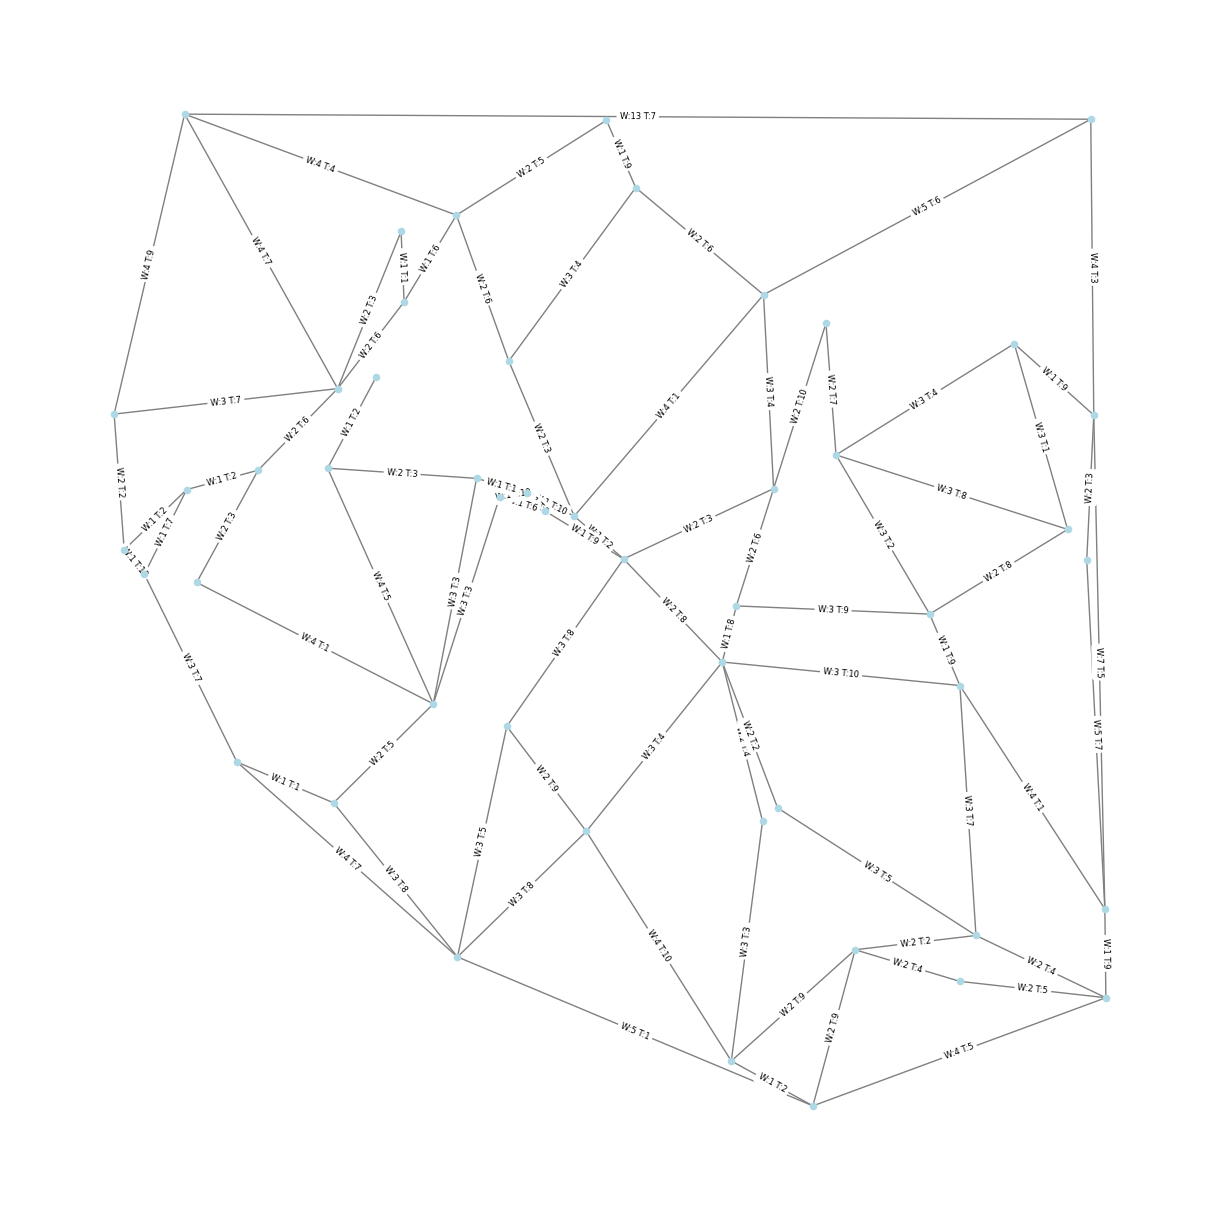

In [3]:
# Example usage
graph = CustomGraph()
graph.build_a_map()
# Draw the graph
graph.draw_graph()


## Initialize Agents

In [4]:
agents = []
starting_node = 1

for i in range(10):
    new_agent = Agent(graph, starting_node)
    agents.append(new_agent)


print(len(agents))

10


## Map Builder

In [5]:
def draw_graph_with_agent(graph, agents, step_time=0.1):
    """Draw the graph with node positions, edge weights, targets, and agents"""
    #plt.clf()  # Clear the current figure
    plt.figure(figsize=(12, 12))

    if not graph.positions:
        graph.positions = nx.spring_layout(graph.G, k=0.1, iterations=50)

    # Draw nodes
    nx.draw(graph.G, graph.positions, with_labels=True, node_color='lightblue', node_size=50, font_size=10)

    # Edge colors based on weight (1=blue, 10=red)
    edge_colors = []
    edge_weights = [graph.G[u][v]['weight'] for u, v in graph.G.edges()]
    for weight in edge_weights:
        color = plt.cm.coolwarm((weight - 1) / 9)  # Color scale from blue to red
        edge_colors.append(color)

    # Draw edges with color coordinated by weight
    nx.draw_networkx_edges(graph.G, graph.positions, edge_color=edge_colors, width=1)

    # Draw edge labels with weights
    edge_labels = {(u, v): f"W:{graph.G[u][v]['weight']},T:{graph.G[u][v]['targets']} " for u, v in graph.G.edges()}
    nx.draw_networkx_edge_labels(graph.G, graph.positions, edge_labels=edge_labels)
    
    # Draw targets on edges (red icons with size proportional to targets)
    for (u, v) in graph.G.edges():
        targets = graph.G[u][v]['targets']
        if targets > 0:
            midpoint = np.mean([graph.positions[u], graph.positions[v]], axis=0)
            plt.scatter(midpoint[0], midpoint[1], s=targets * 100, c='red', alpha=0.7)  # Size scales with targets


    # Draw agents on the map as red dots
    for agent in agents:
        agent_pos = graph.positions[agent.current_node]
        plt.scatter(agent_pos[0], agent_pos[1], s=300, c='green', edgecolors='black', label=f'Agent @ {agent.current_node}')

    plt.legend(loc='upper right')
    plt.pause(step_time)  # Pause to display the plot for a moment before clearing it


# Simulator

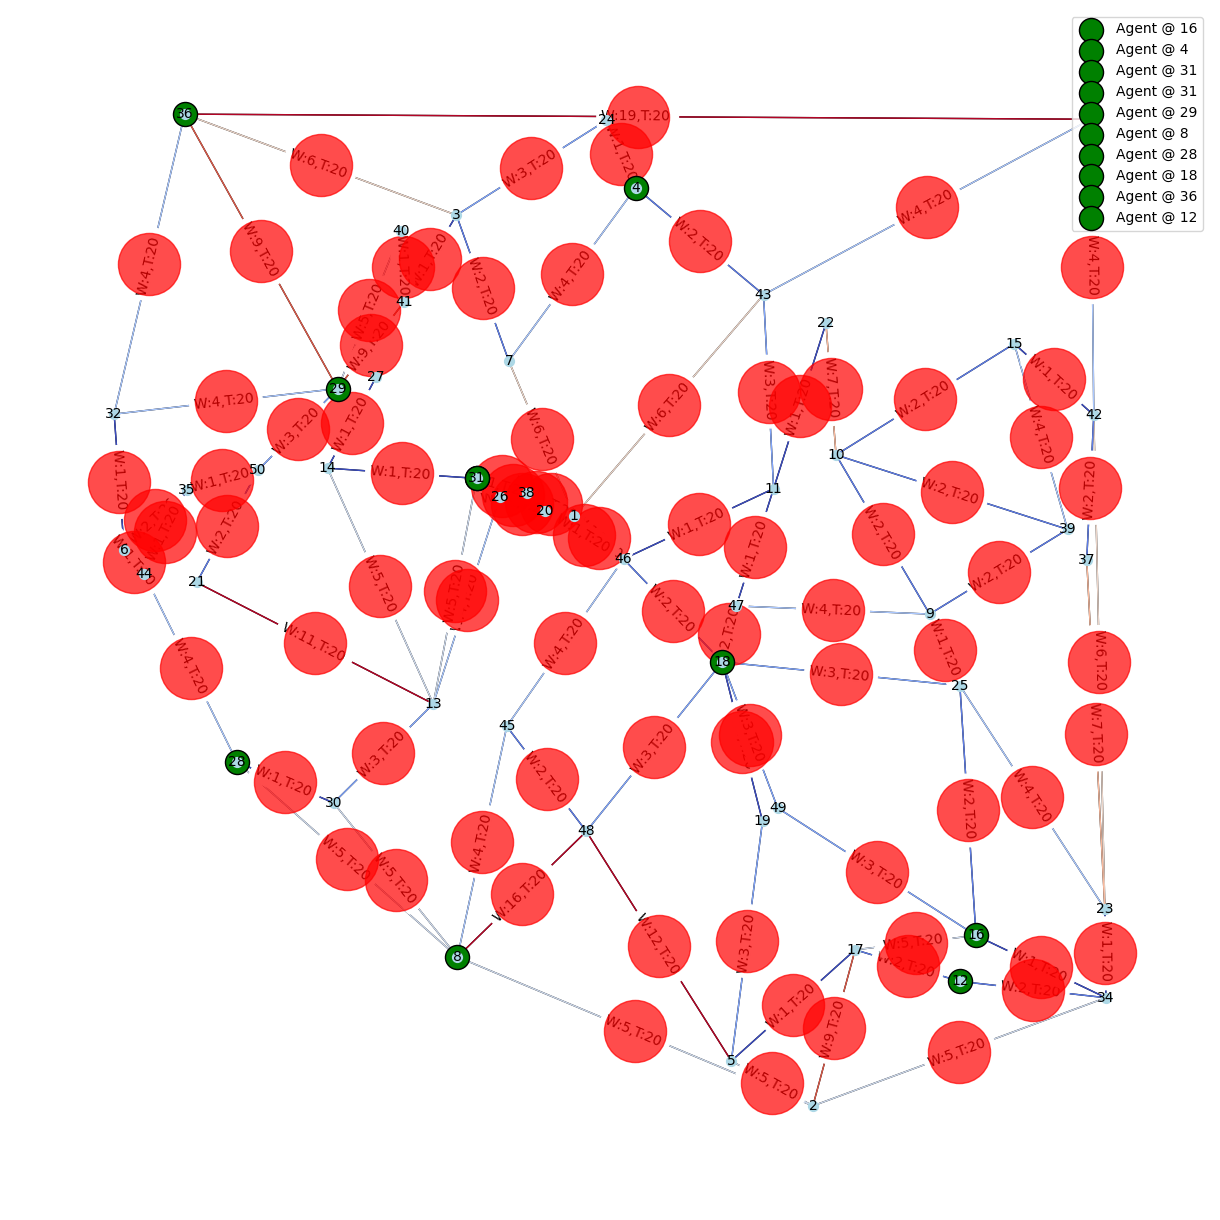

Moving from node 16 to node 25
Moving from node 4 to node 24
Moving from node 31 to node 14
Moving from node 31 to node 13
Moving from node 29 to node 36
Moving from node 8 to node 30
Moving from node 28 to node 30
Moving from node 18 to node 49
Moving from node 36 to node 29
Moving from node 12 to node 17


In [6]:
#initialize map??
step_time = 0.0
for step in range(1000):
    draw_graph_with_agent(graph, agents)

    for agent in agents:
        agent.step()
    
    graph.update_map()
    sleep(step_time)
    clear_output(wait=True)  # Clear previous output in the notebook